In [3]:
import matplotlib.pyplot as plt
#sample data

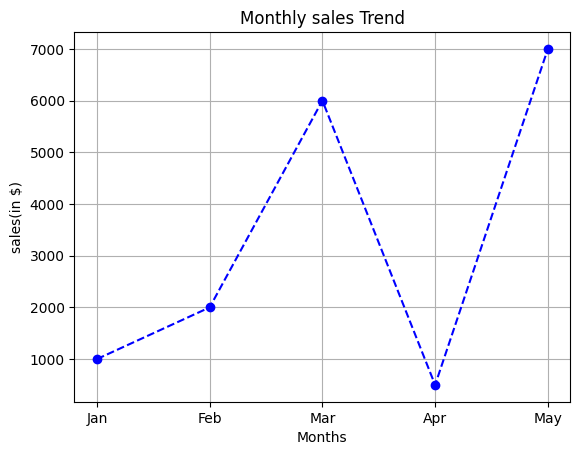

In [9]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May']
sales=[1000, 2000, 6000, 500,7000]
plt.plot(months,sales,color='blue', marker='o', linestyle='--')
#adding labels and titles
plt.title("Monthly sales Trend")
plt.xlabel("Months")
plt.ylabel("sales(in $)")
plt.grid(True)
plt.show()

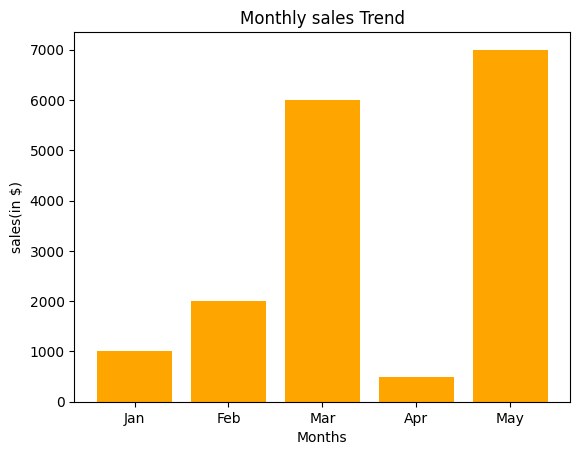

In [11]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May']
sales=[1000, 2000, 6000, 500,7000]
plt.bar(months, sales, color='orange')
plt.title("Monthly sales Trend")
plt.xlabel("Months")
plt.ylabel("sales(in $)")
plt.grid(False)
plt.show()

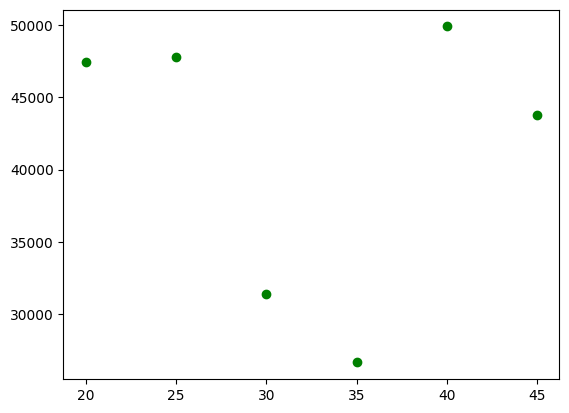

In [21]:
#scatter plot
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(20,50,5)
y=np.random.randint(25000,50000,len(x)) # Make y the same size as x
plt.scatter(x,y, color='green')
plt.show()

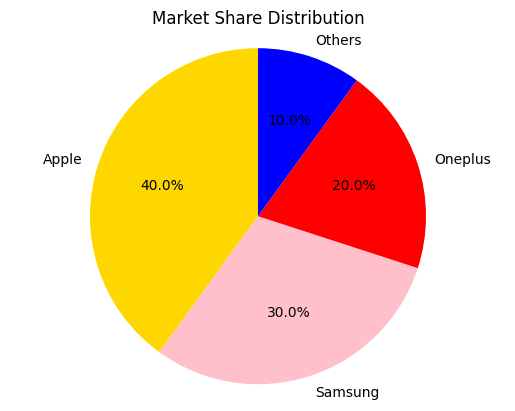

In [24]:
#pie chart
brands=['Apple','Samsung','Oneplus','Others']
market_shares=[40,30,20,10]
colors=['gold', 'pink','red','blue']
plt.pie(market_shares,labels=brands, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Market Share Distribution')
plt.show()

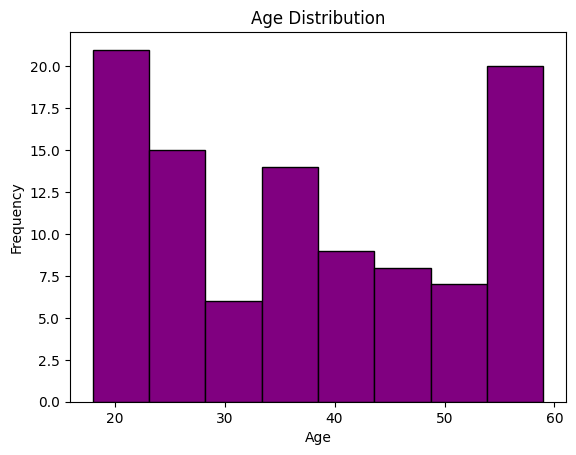

In [28]:
#histogram
ages=np.random.randint(18,60,100)
plt.hist(ages, bins=8, color = 'purple', edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

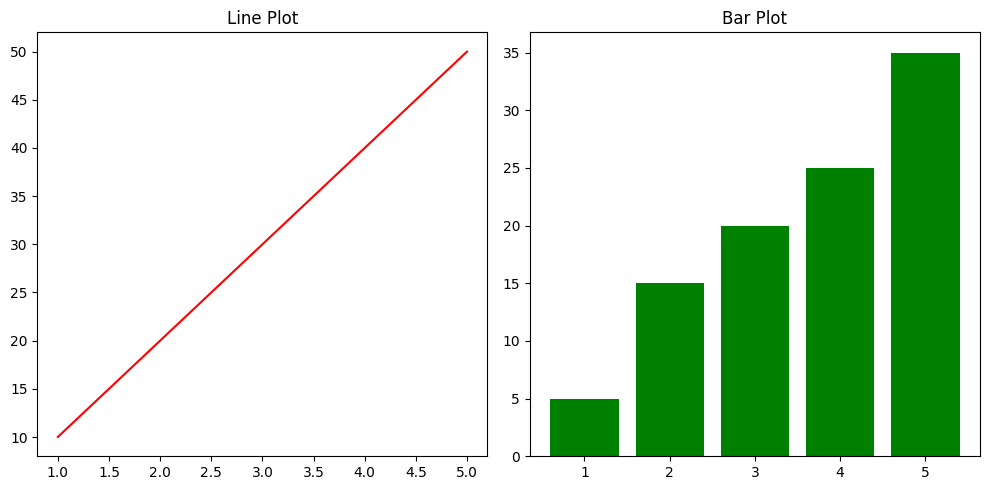

In [31]:
x=[1,2,3,4,5]
y1=[10,20,30,40,50]
y2=[5,15,20,25,35]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x,y1, color='red')
plt.title('Line Plot')
plt.subplot(1,2,2)
plt.bar(x,y2, color='green')
plt.title('Bar Plot')
plt.tight_layout()
plt.show()

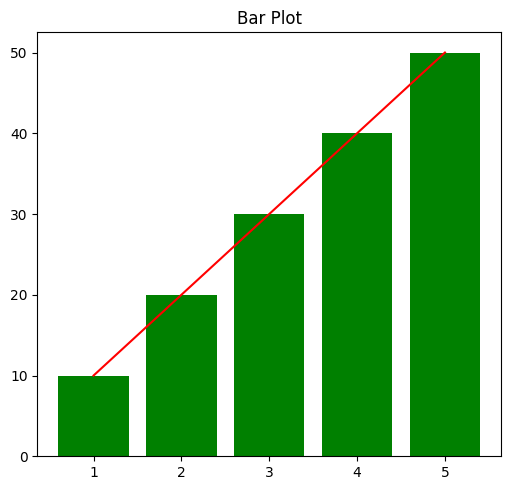

In [32]:
x=[1,2,3,4,5]
y=[10,20,30,40,50]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x,y1, color='red')
plt.subplot(1,2,1)
plt.bar(x,y1, color='green')
plt.title('Bar Plot')
plt.tight_layout()
plt.show()

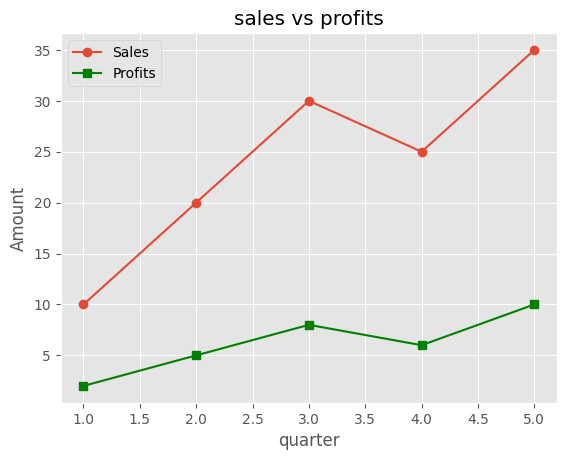

In [35]:
plt.style.use('ggplot')
x=[1,2,3,4,5]
sales=[10,20,30,25,35]
profits=[2,5,8,6,10]
plt.plot(x,sales, label='Sales', marker='o')
plt.plot(x,profits, label='Profits', marker='s', color='green')
plt.xlabel('quarter')
plt.ylabel('Amount')
plt.title('sales vs profits')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
path='/content/drive/My Drive/Data_sets/data.csv'
df=pd.read_csv(path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020/12/01,110,130,409.1
1,60,2020/12/02,117,145,479.0
2,60,2020/12/03,103,135,340.0
3,45,2020/12/04,109,175,282.4
4,45,2020/12/05,117,148,406.0


In [40]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


In [41]:
df.shape

(32, 5)

In [43]:
df.isnull().sum()

,0
Duration,0
Date,1
Pulse,0
Maxpulse,0
Calories,2


In [45]:
df=df.dropna()
df.isnull().sum()

,0
Duration,0
Date,0
Pulse,0
Maxpulse,0
Calories,0


In [46]:
df.shape

(29, 5)

In [47]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values(by='Date')
invalid_dates_count = df['Date'].isnull().sum()
print(f"Number of rows with invalid/missing dates: {invalid_dates_count}")

Number of rows with invalid/missing dates: 0


In [48]:
df.columns

Index(['Duration', 'Date', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

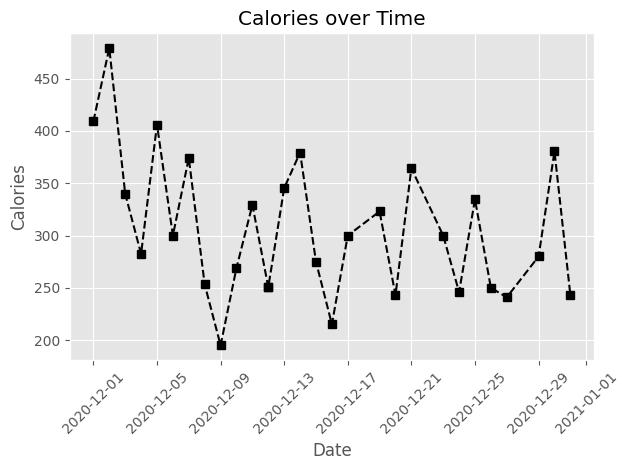

In [53]:
plt.plot(df['Date'],df['Calories'], marker='s', linestyle='--', color='black')
plt.title('Calories over Time')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('line_calories_over_time.png')
plt.show()

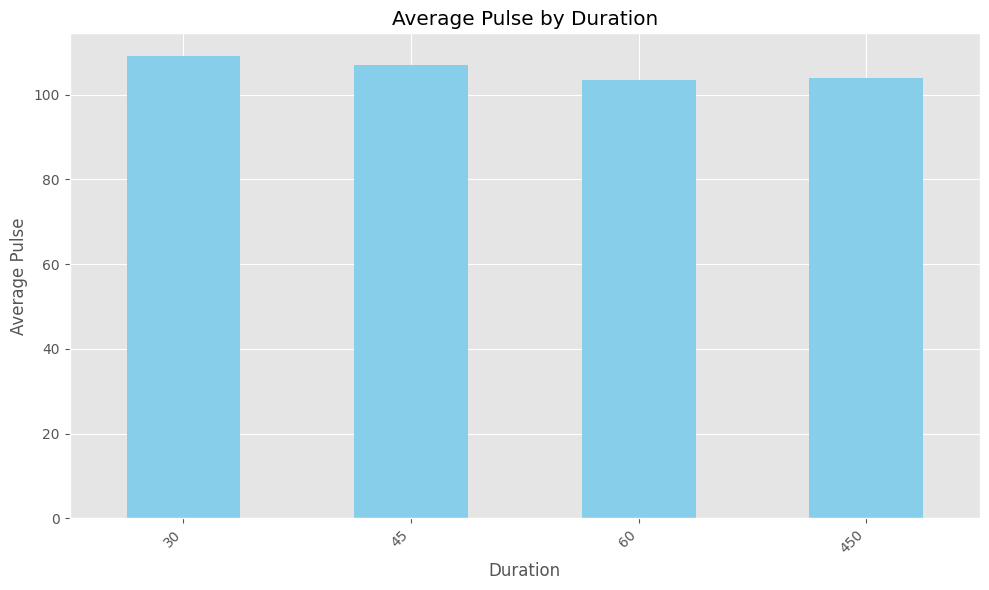

In [55]:
# Group by Duration and calculate the average Pulse
average_pulse_by_duration = df.groupby('Duration')['Pulse'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
average_pulse_by_duration.plot(kind='bar', color='skyblue')
plt.title('Average Pulse by Duration')
plt.xlabel('Duration')
plt.ylabel('Average Pulse')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

•  Plot a scatter plot of Duration vs Calories, compute the Pearson correlation coefficient, and add a linear trend line to the scatter; save as scatter_duration_vs_calories.png.

•  Create a pie chart showing the percentage breakdown of Maxpulse into ranges (e.g., <=120, 121–140, 141–160, >160) and save as pie_maxpulse_ranges.png.

•  Plot a histogram of Calories with an appropriate number of bins, comment on shape/skewness, and save as hist_calories.png.

•  Build a multi-panel subplot figure (1 row × 2 columns): left = line plot of Pulse over Date, right = scatter of Duration vs Maxpulse; save as subplots_pulse_duration_maxpulse.png.


Pearson correlation coefficient between Duration and Calories: -0.12


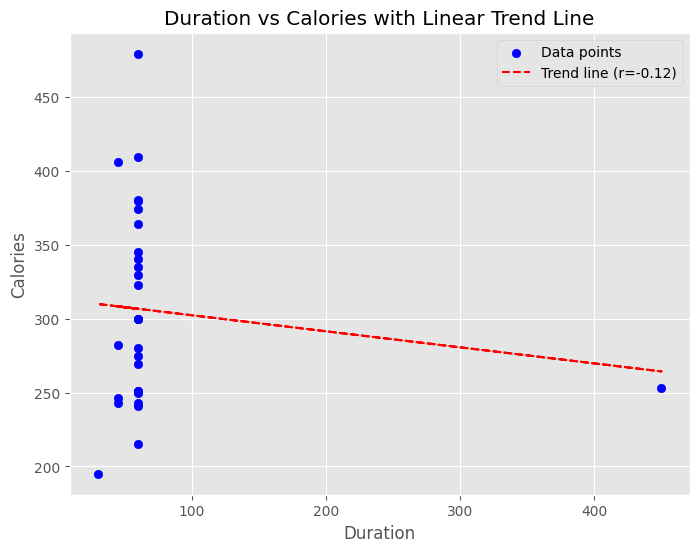

In [56]:
from scipy.stats import pearsonr
import numpy as np

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Duration'], df['Calories'], color='blue', label='Data points')

# Compute Pearson correlation coefficient
correlation, _ = pearsonr(df['Duration'], df['Calories'])
print(f"Pearson correlation coefficient between Duration and Calories: {correlation:.2f}")

# Add linear trend line
# Calculate the coefficients of the linear regression line (y = mx + c)
m, c = np.polyfit(df['Duration'], df['Calories'], 1)
# Create a polynomial object using the coefficients
trendline = np.poly1d([m, c])
# Generate y-values for the trend line based on x-values
plt.plot(df['Duration'], trendline(df['Duration']), color='red', linestyle='--', label=f'Trend line (r={correlation:.2f})')

plt.title('Duration vs Calories with Linear Trend Line')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.legend()
plt.grid(True)
plt.savefig('scatter_duration_vs_calories.png')
plt.show()

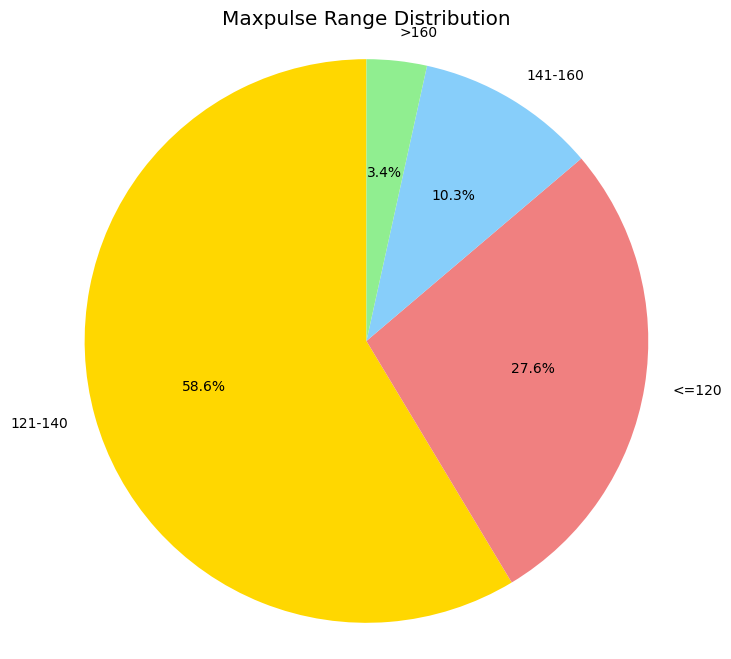

In [57]:
# Define the ranges for Maxpulse
bins = [0, 120, 140, 160, df['Maxpulse'].max()]
labels = ['<=120', '121-140', '141-160', '>160']

# Categorize Maxpulse into ranges
df['Maxpulse_Range'] = pd.cut(df['Maxpulse'], bins=bins, labels=labels, right=True, include_lowest=True)

# Count the occurrences in each range
maxpulse_counts = df['Maxpulse_Range'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(maxpulse_counts, labels=maxpulse_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Maxpulse Range Distribution')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('pie_maxpulse_ranges.png')
plt.show()

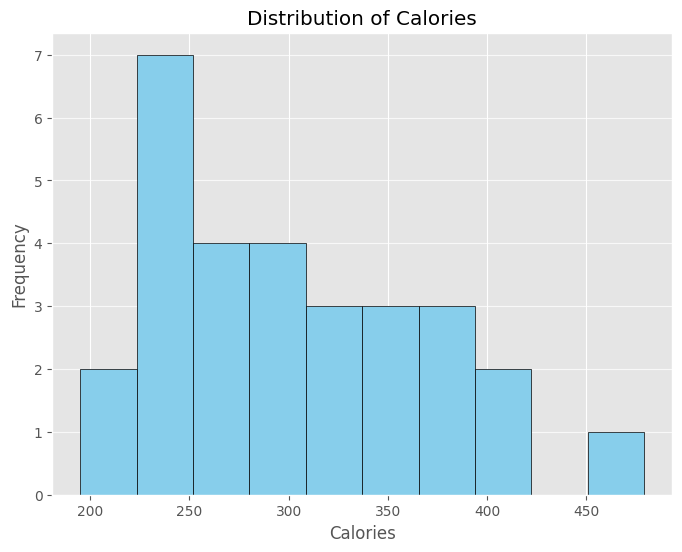

In [58]:
# Plot a histogram of Calories
plt.figure(figsize=(8, 6))
plt.hist(df['Calories'], bins=10, color='skyblue', edgecolor='black') # Using 10 bins as a starting point
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('hist_calories.png')
plt.show()

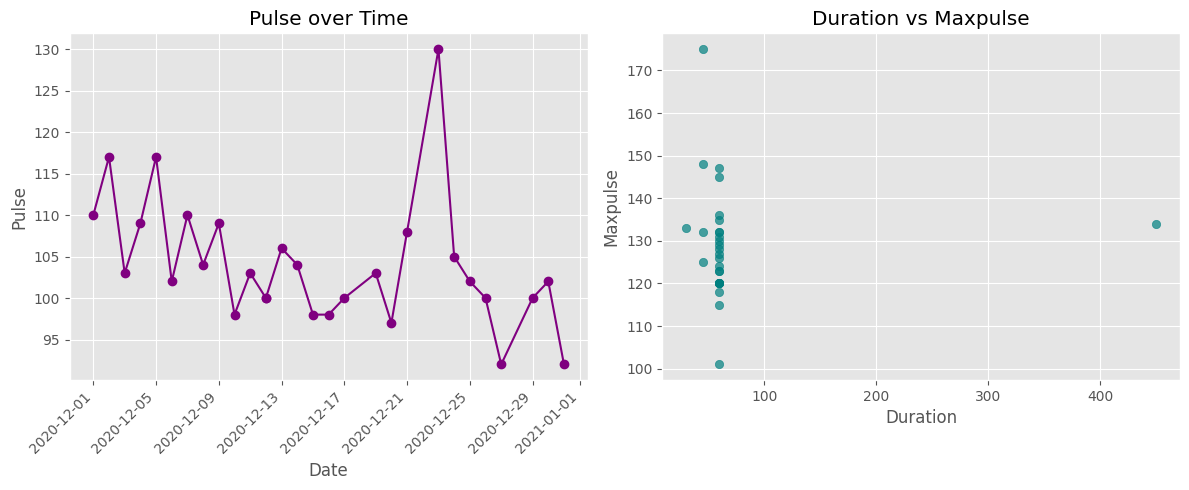

In [59]:
# Build a multi-panel subplot figure
plt.figure(figsize=(12, 5)) # Adjust figure size as needed

# Left subplot: Line plot of Pulse over Date
plt.subplot(1, 2, 1)
plt.plot(df['Date'], df['Pulse'], marker='o', linestyle='-', color='purple')
plt.title('Pulse over Time')
plt.xlabel('Date')
plt.ylabel('Pulse')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Right subplot: Scatter plot of Duration vs Maxpulse
plt.subplot(1, 2, 2)
plt.scatter(df['Duration'], df['Maxpulse'], color='teal', alpha=0.7)
plt.title('Duration vs Maxpulse')
plt.xlabel('Duration')
plt.ylabel('Maxpulse')
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping
plt.savefig('subplots_pulse_duration_maxpulse.png')
plt.show()

In [60]:
path='/content/drive/My Drive/Data_sets/tip.csv'
df=pd.read_csv(path)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [63]:
df.shape

(244, 7)

In [65]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


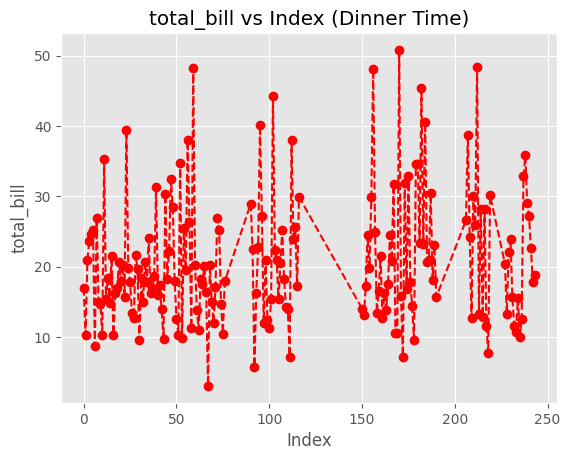

In [72]:
# Filter data for 'Dinner' time
dinner_df = df[df['time'] == 'Dinner']

# Plot total_bill against index for Dinner time
plt.plot(dinner_df.index, dinner_df['total_bill'], color='red', marker='o', linestyle='--')
plt.title("total_bill vs Index (Dinner Time)") # Updated title
plt.xlabel("Index")
plt.ylabel("total_bill")
plt.grid(True)
plt.show()